Project_1_Sect_2_Assmt

Task List

Report how many missing values there are in each column of your House Prices dataset.
Remove the columns in your dataset which have less than 700 non-NaN values.
Perform median imputation on your dataset.
Draw a pairplot on your dataset and choose the features that, in your view, are correlated with the dependent variable SalePrice.
Train a linear regression model on the dataset.
Report the values of the coefficients and the intercept of your model. Use these values to write the formula used for linear regression on this dataset.
Compute the R2 score of your linear regressor using an adequate testing dataset.



Preparation


In [22]:
import pandas as pd

In [23]:
url = "https://raw.githubusercontent.com/mtsilimos/url/main/houseprices.csv"
dataset = pd.read_csv(url)
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [25]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


Report how many missing values there are in each column of your House Prices dataset.


In [34]:
dataset.isnull().sum().sort_values(ascending = False).head(50)

FireplaceQu      690
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
Electrical         1
OpenPorchSF        0
WoodDeckSF         0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
SaleCondition      0
HalfBath           0
SaleType           0
YrSold             0
MoSold             0
MiscVal            0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
PoolArea           0
1stFlrSF           0
GarageYrBlt        0
ScreenPorch        0
GarageCars         0
GarageArea         0
3SsnPorch          0
EnclosedPorch      0
PavedDrive         0
Id                 0
HeatingQC          0
CentralAir         0
LotConfig          0
HouseStyle         0
BldgType           0
Condition2         0
Condition1   


Remove the columns in your dataset which have less than 700 non-NaN values.


In [27]:
dataset.dropna(axis=1, thresh = 700, inplace = True)


Perform median imputation on your dataset.


In [28]:
dataset.shape

(1460, 76)

In [30]:
dataset = dataset.fillna(dataset.median(numeric_only=True))

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
numerical_columns = dataset.select_dtypes(include='number')
print(numerical_columns.columns.tolist())

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [41]:
numerical_columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


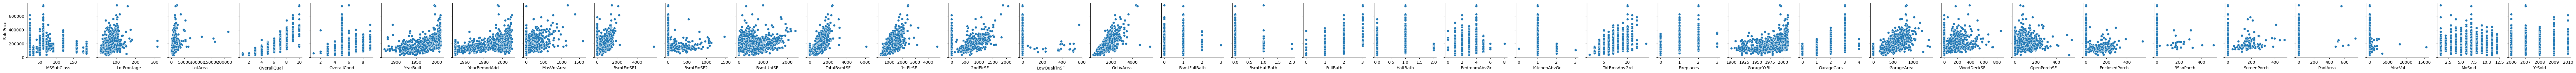

In [42]:
sns.pairplot(dataset, x_vars=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'], y_vars = ['SalePrice'])


Draw a pairplot on your dataset and choose the features that, in your view, are correlated with the dependent variable SalePrice.


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


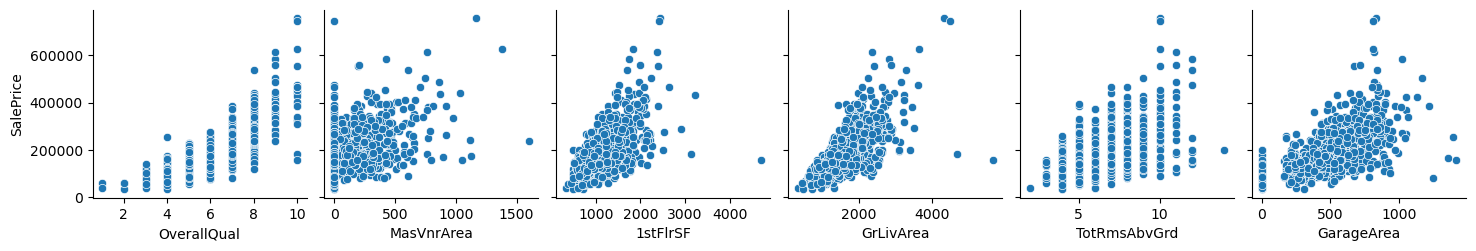

In [43]:
sns.pairplot(dataset, x_vars=['OverallQual', 'MasVnrArea', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageArea'], y_vars = ['SalePrice'])


Train a linear regression model on the dataset.


In [49]:
df = dataset[['SalePrice', 'OverallQual', 'MasVnrArea', '1stFlrSF', 'GrLivArea', 'GarageArea']]

In [50]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [52]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()


Report the values of the coefficients and the intercept of your model. Use these values to write the formula used for linear regression on this dataset.


In [53]:
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(X, model.coef_))

Intercept:  -106508.2432699076
Coefficients:


[('OverallQual', 24736.553300978587),
 ('MasVnrArea', 44.22579197963139),
 ('1stFlrSF', 35.604631699848966),
 ('GrLivArea', 42.52635295706738),
 ('GarageArea', 56.64920115926298)]

y = - -106508.2 + 24736.5 * 'OverallQual' + 44.2 * 'MasVnrArea' + 35.6 '1stFlrSF' + 42.5 * 'GrLivArea' + 56.6 * 'GarageArea'


Compute the R2 score of your linear regressor using an adequate testing dataset.


In [54]:
y_pred = model.predict(X_test)

In [55]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
r2

0.6126521048929685